# Loading the data

In [1]:
import pandas as pd
df = pd.read_csv('twitter_new.csv', encoding = 'latin-1', names = ['Target', 'Id', 'Date', 'Flag', 'User', 'Text'])
df

,Target,Id,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id      1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


no null values present

In [3]:
df.shape

(1600000, 6)

<Axes: xlabel='Target', ylabel='count'>

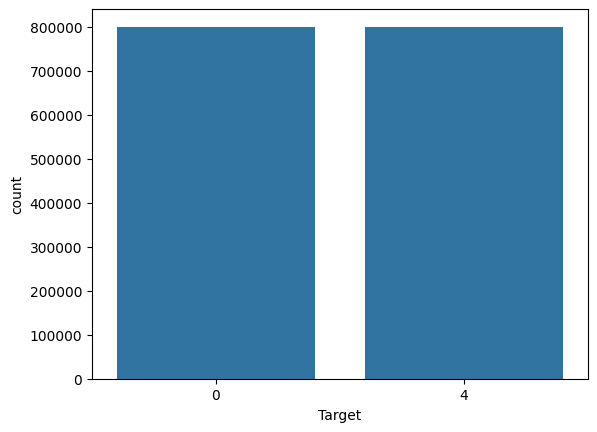

In [3]:
import seaborn as sns
sns.countplot(x = 'Target', data = df)

The target variable has equal distribution of polarities

# Data cleaning and pre_processing

In [4]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

text_list = []
lemmatizer = WordNetLemmatizer() 
for i in df['Text']:
    words_lemmatize = []
    cleaned = re.sub(r"http\S+|www\S+|@\S+|#\S+|[^a-zA-Z\s]", " ", i)
    cleaned = re.sub(r"\s+", " ", cleaned).strip()
    cleaned = cleaned.lower()
    words = cleaned.split()
    words_lemmatize = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    cleaned_text = " ".join( words_lemmatize)
    text_list.append(cleaned_text)
text_list    

['bummer shoulda got david carr third day',
 'upset update facebook texting might cry result school today also blah',
 'dived many time ball managed save rest go bound',
 'whole body feel itchy like fire',
 'behaving mad see',
 'whole crew',
 'need hug',
 'hey long time see yes rain bit bit lol fine thanks',
 'nope',
 'que muera',
 'spring break plain city snowing',
 'pierced ear',
 'bear watch thought ua loss embarrassing',
 'count idk either never talk anymore',
 'would first gun really though zac snyder doucheclown',
 'wish got watch miss premiere',
 'hollis death scene hurt severely watch film wry director cut',
 'file tax',
 'ahh ive always wanted see rent love soundtrack',
 'oh dear drinking forgotten table drink',
 'day get much done',
 'one friend called asked meet mid valley today time sigh',
 'baked cake ated',
 'week going hoped',
 'blagh class tomorrow',
 'hate call wake people',
 'going cry sleep watching marley',
 'im sad miss lilly',
 'ooooh lol leslie ok leslie get mad'

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = TfidfVectorizer(ngram_range = (1,2), stop_words = 'english', max_features = 5000)
x = vectorizer.fit_transform(text_list)  

In [9]:
y = df['Target']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)    

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.2, random_state = 1)

# Logistic Regression model

In [11]:
from sklearn.linear_model import LogisticRegression
trainer = LogisticRegression(random_state = 1, n_jobs = -1)
trainer.fit(x_train, y_train)
model = trainer.fit(x_train,y_train)

In [12]:
from sklearn import metrics
y_pred = model.predict(x_test)
score = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.73      0.76    160156
           1       0.75      0.79      0.77    159844

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

[[117534  42622]
 [ 32948 126896]]


In [13]:
train_score = trainer.score(x_train, y_train)
test_score = trainer.score(x_test, y_test)
print('Training score:', train_score)
print('Testing score:', test_score)


Training score: 0.76499140625
Testing score: 0.76384375


Text(0.5, 1.0, 'Confusion Matrix')

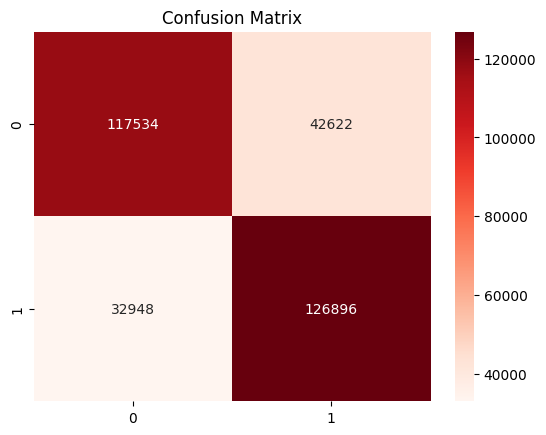

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')

# SVM model

In [12]:
from sklearn.svm import LinearSVC
trainer = LinearSVC()
trainer.fit(x_train, y_train)
model = trainer.fit(x_train,y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [13]:
y_pred = model.predict(x_test)
score = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75    160156
           1       0.75      0.80      0.77    159844

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

[[116471  43685]
 [ 32177 127667]]


In [14]:
train_score = trainer.score(x_train, y_train)
test_score = trainer.score(x_test, y_test)
print('Training score:', train_score)
print('Testing score:', test_score)

Training score: 0.76443515625
Testing score: 0.76293125


Text(0.5, 1.0, 'Confusion Matrix')

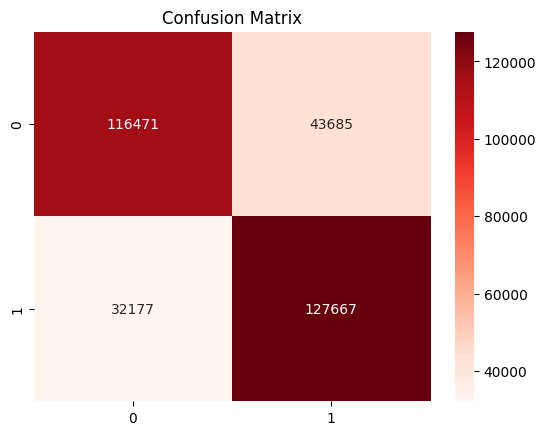

In [15]:
sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')

# Decision Tree model

In [16]:
from sklearn.tree import DecisionTreeClassifier
trainer = DecisionTreeClassifier(random_state =1, max_depth = 3, min_samples_split = 25,
                                                    min_samples_leaf = 5, max_features = 'log2')
trainer.fit(x_train, y_train)
model = trainer.fit(x_train, y_train)

In [17]:
y_pred = model.predict(x_test)
score = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

              precision    recall  f1-score   support

           0       0.71      0.04      0.08    160156
           1       0.51      0.98      0.67    159844

    accuracy                           0.51    320000
   macro avg       0.61      0.51      0.37    320000
weighted avg       0.61      0.51      0.37    320000

[[  6889 153267]
 [  2796 157048]]


In [18]:
train_score = trainer.score(x_train, y_train)
test_score = trainer.score(x_test, y_test)
print('Training score:', train_score)
print('Testing score:', test_score)

Training score: 0.5126328125
Testing score: 0.512303125


Text(0.5, 1.0, 'Confusion Matrix')

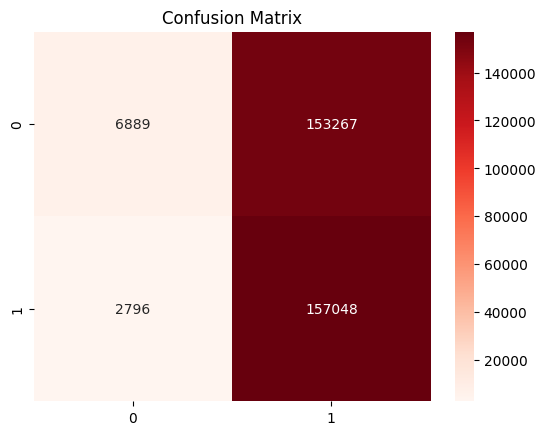

In [19]:
sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')

# XG Boost model

In [35]:
from xgboost import XGBClassifier
trainer = XGBClassifier(n_estimators = 300, random_state = 1, learning_rate = 0.8, max_depth = 5,
                        subsample = 0.8, colsample_bytree = 0.5, min_child_weight = 3,
                        booster = 'gbtree', scale_pos_weight = 1, objective = 'binary:logistic')
trainer.fit(x_train, y_train)
model = trainer.fit(x_train, y_train)

In [36]:
y_pred = model.predict(x_test)
score = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.71      0.75    160156
           1       0.73      0.80      0.77    159844

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

[[113714  46442]
 [ 31250 128594]]


In [37]:
train_score = trainer.score(x_train, y_train)
test_score = trainer.score(x_test, y_test)
print('Training score:', train_score)
print('Testing score:', test_score)

Training score: 0.76503125
Testing score: 0.7572125


Text(0.5, 1.0, 'Confusion Matrix')

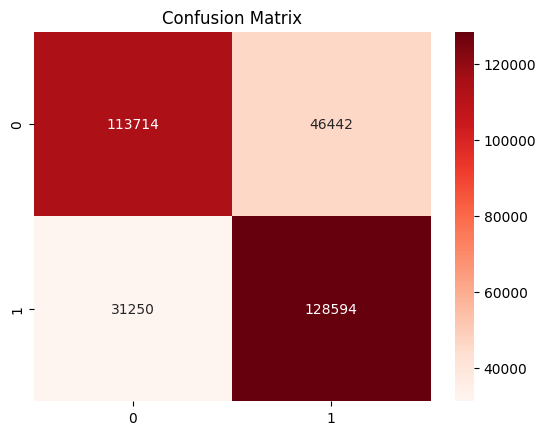

In [38]:
sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')

# Random Forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
trainer = RandomForestClassifier(n_estimators = 150, random_state = 1, max_features = 150,
                                    min_samples_split = 3, max_depth = 5, min_samples_leaf = 5)
trainer.fit(x_train, y_train)
model = trainer.fit(x_train,y_train)

In [30]:
y_pred = model.predict(x_test)
score = metrics.classification_report(y_test, y_pred)
matrix = metrics.confusion_matrix(y_test, y_pred)
print(score)
print(matrix)

              precision    recall  f1-score   support

           0       0.79      0.47      0.59    160156
           1       0.62      0.88      0.73    159844

    accuracy                           0.67    320000
   macro avg       0.71      0.67      0.66    320000
weighted avg       0.71      0.67      0.66    320000

[[ 74915  85241]
 [ 19526 140318]]


In [31]:
train_score = trainer.score(x_train, y_train)
test_score = trainer.score(x_test, y_test)
print('Training score:', train_score)
print('Testing score:', test_score)

Training score: 0.6728171875
Testing score: 0.672603125


Text(0.5, 1.0, 'Confusion Matrix')

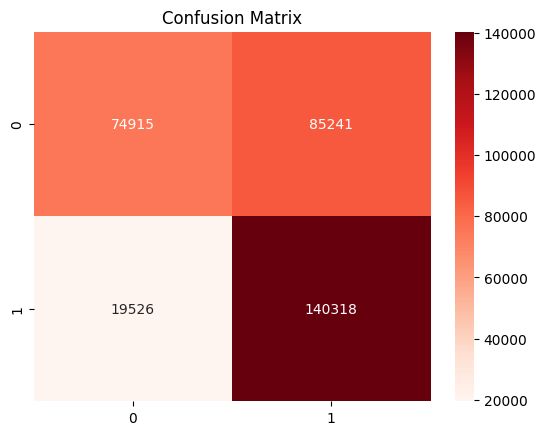

In [36]:
sns.heatmap(matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.title('Confusion Matrix')

# Inference

SVM, Logistic and XG Boost models deliver theb same accuracy of 76%. So these can be selected and further improved as there is scope for it.